In [2]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.models import load_model

In [3]:
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [4]:
x_train= x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [5]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='Softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
from keras.callbacks import EarlyStopping
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=100,verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=20)],validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 10s 19ms/step - loss: 0.2756 - accuracy: 0.9025 - val_loss: 0.4466 - val_accuracy: 0.8783
Epoch 2/100
469/469 [==============================] - 9s 19ms/step - loss: 0.2660 - accuracy: 0.9048 - val_loss: 0.4920 - val_accuracy: 0.8661
Epoch 3/100
469/469 [==============================] - 9s 19ms/step - loss: 0.2621 - accuracy: 0.9073 - val_loss: 0.3983 - val_accuracy: 0.8816
Epoch 4/100
469/469 [==============================] - 10s 21ms/step - loss: 0.2561 - accuracy: 0.9071 - val_loss: 0.5172 - val_accuracy: 0.8802
Epoch 5/100
469/469 [==============================] - 10s 21ms/step - loss: 0.2525 - accuracy: 0.9092 - val_loss: 0.4745 - val_accuracy: 0.8787
Epoch 6/100
469/469 [==============================] - 9s 19ms/step - loss: 0.2457 - accuracy: 0.9122 - val_loss: 0.5560 - val_accuracy: 0.8862
Epoch 7/100
469/469 [==============================] - 9s 19ms/step - loss: 0.2441 - accuracy: 0.9137 - val_loss: 0.5661 - val_accura

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8380 - accuracy: 0.8820


[0.8380120992660522, 0.8820000290870667]

In [13]:
model.save("fashion.h5")

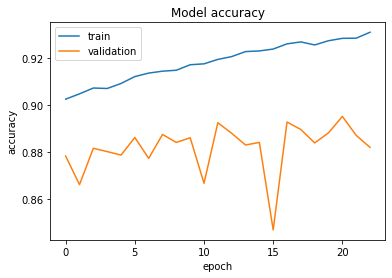

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "validation"], loc = "upper left")

In [ ]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test)  =  data.load_data()

4431872/4422102 [==============================] - 0s 0us/step
